### Load Data and Extract Peaks

In [1]:
%pip install numpy
%pip install matplotlib
%pip install scipy
%pip install pylab

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement pylab (from versions: none)
ERROR: No matching distribution found for pylab
Note: you may need to restart the kernel to use updated packages.


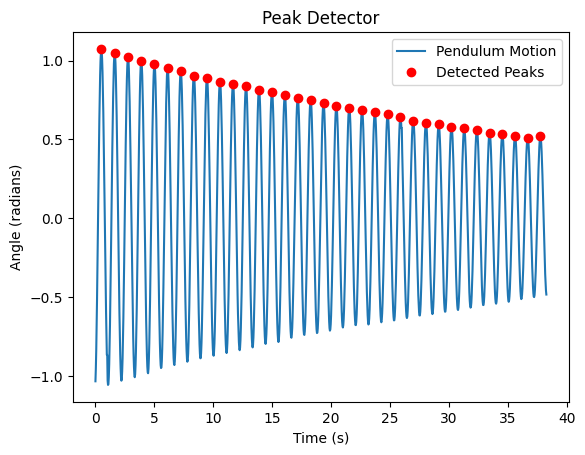

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Example data (replace this with your actual data)
from pylab import loadtxt

def load_data(filename):
    data=loadtxt(filename, usecols=(0,1,2,3), skiprows=1, unpack=True)
    return data

data = load_data("decaydata.txt")
time = data[0] #x
angles = data[1] #y

# Find peaks (local maxima)
peaks, _ = find_peaks(angles)

# Extract time and angle values at the peaks
peak_times = time[peaks]
peak_angles = angles[peaks]

# Plot to verify
plt.plot(time, angles, label='Pendulum Motion')
plt.plot(peak_times, peak_angles, 'ro', label='Detected Peaks')
plt.title("Peak Detector")
plt.xlabel('Time (s)')
plt.ylabel('Angle (radians)')
plt.legend()
plt.show()

### Find exponential decay with peaks

In [53]:
from scipy.optimize import curve_fit

# Exponential decay model
def exp_decay(t, theta_0, tau):
    return theta_0 * np.exp(-t / tau)

# Fit the exponential decay to the peak data
params, covariance = curve_fit(exp_decay, peak_times, peak_angles)

uncertainties = np.round(np.sqrt(np.diag(covariance)), 3)

print(uncertainties)

theta_0, tau = params  # Extract theta_0 (initial amplitude) and tau (decay constant)

print(round(theta_0, 3), round(tau, 3))

[0.002 0.252]
1.081 49.32


### Find the Q-Factor (Equation 3):

In [85]:
# L = 0.284 #Total length from the center of mass from the top of the pendulum
# T = 2 * np.sqrt(L)

T_VALS = np.array([1.167, 1.067, 0.934, 0.900, 1.067, 1.167, 1.100, 1.117])#Period values from the first lab
T = np.mean(T_VALS) #avg it out
print(f'{round(T, 3)} +/- {round(np.std(T_VALS), 3)}')

Q = np.pi * (tau/T)
Q = round(Q, 1)
T = round(T, 2)
print(Q)


1.065 +/- 0.093
145.5


### Compute the Uncertainties

In [86]:
# Type B Uncertainties for single trial
import math

# Period uncertainty = 1/(2*frame rate) -- frame rate of the video
FRAME_RATE = 30 #fps

T_err = 1/(2*FRAME_RATE)
print(T_err)

# Angle uncertainty can be measured as the thickness of the pendulum bob

# error = angle to center of mass - angle of each edge of the pendulum bob 
theta_width1 = math.radians(-90 -(-26.6)) #measured errors
theta_width2 = math.radians(-90 -(-35.8))

# Calculate the angular distances of the thickness to the original angle
theta_err = np.abs(theta_width1 - theta_width2)
theta_err /= 2 #The averaged uncertainty is half of the distances between each edge/error
print(theta_err)

0.016666666666666666
0.0802851455917391


### Plot:

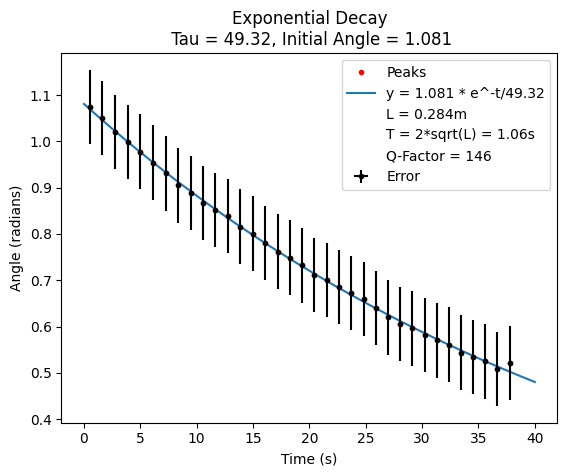

In [87]:
# Plot exponential decay
plt.plot(peak_times, peak_angles, 'ro', markersize=3, label='Peaks')

# Generate the line
x = np.linspace(0, 40, 400) # 400 points between 0, 40 (domain of our graph)
y = exp_decay(x, theta_0, tau)
plt.plot(x, y, label=f'y = {round(theta_0, 3)} * e^-t/{round(tau, 3)}')

# Constants
plt.plot([], [], ' ', label=f'L = {L}m')
plt.plot([], [], ' ', label=f'T = 2*sqrt(L) = {T}s')
plt.plot([], [], ' ', label=f'Q-Factor = {int(round(Q, 0))}')

# Graph
plt.title(f"Exponential Decay\n Tau = {round(tau, 3)}, Initial Angle = {round(theta_0, 3)}")
plt.errorbar(peak_times, peak_angles, xerr=T_err, yerr=theta_err, fmt='.', label="Error", color="black")
plt.xlabel('Time (s)')
plt.ylabel('Angle (radians)')
plt.legend()
plt.show()

# Frame rate divided by time


### Find the Q-Factor (Number of Oscillations Method)

In [89]:
divisor = 4 # go for 46%

num_peaks_before_threshold = 0 
for peak in peaks:
    num_peaks_before_threshold += 1
    if (angles[peak] <= np.exp(-np.pi/divisor) * theta_0 * 0.46):
        break
Q2 =(num_peaks_before_threshold-1)*divisor
print(Q2)

136
